In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

Provided below is the RE24 matrix from FanGraphs. Each value represents the average number of runs scored in the inning in that situation. For example, with a runner on 1st and 0 outs, the average number of runs scored in the inning would be 0.831. 

The formula for RE24 is:

RE24 = RE End State - RE Beginning State + Runs Scored

For example, if a batter hit a single with a runner on 1st and 0 outs and the runner moved to 3rd, the RE24 from that at-bat would be 1.798 - 0.831 + 0 = 0.967 RE24. The batter did not directly recieve and RBI for the at-bat or a significant boost to his OPS, but he did increase the average number of runs per that inning by almost 1. Therein lies the beauty of this stat, it highlights the batter's ability to increase the odds of scoring despite the lackluster change in baseline numbers. 

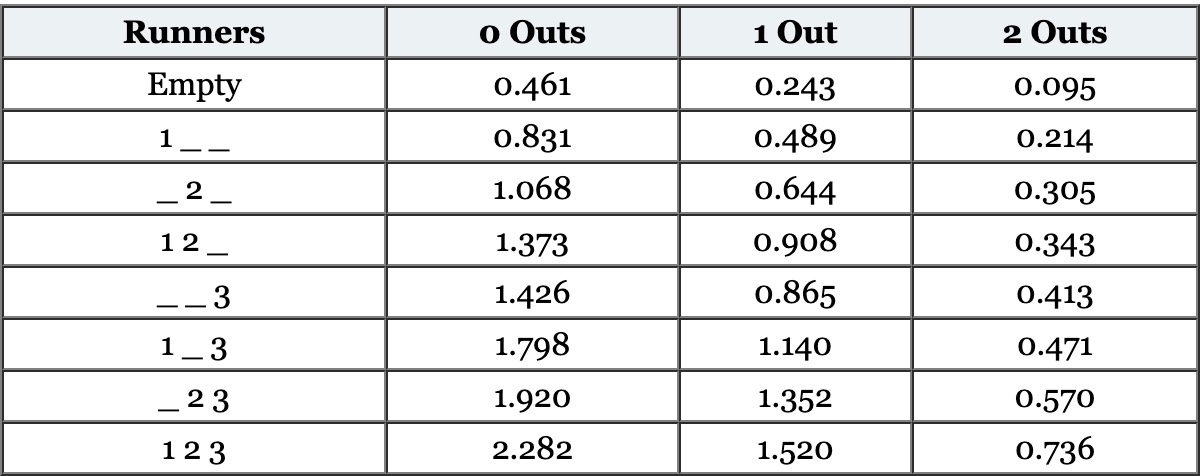

In [2]:
df_cl = pd.read_csv('/Users/treychase/Downloads/mlb_2024_clutch.csv')
#Opening the clutch dataset from Baseball Reference

In [3]:
df_cl.describe()
#getting the general description

,Rk,Age,PA,BtRuns,WPA,aLI,Clutch,RE24
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,515.000000,519.000000
mean,260.000000,28.177264,96.551060,0.005780,-0.125434,1.008536,-0.002913,-0.972447
std,149.966663,3.619897,60.644263,5.102555,0.565488,0.510901,0.359490,5.467100
min,1.000000,20.000000,0.000000,-13.100000,-2.000000,0.000000,-1.500000,-16.200000
25%,130.500000,25.000000,40.000000,-3.000000,-0.500000,0.910000,-0.200000,-4.400000
50%,260.000000,28.000000,94.000000,-0.600000,-0.200000,0.980000,0.000000,-1.200000
75%,389.500000,31.000000,149.000000,2.350000,0.100000,1.070000,0.200000,1.600000
max,519.000000,39.000000,213.000000,25.500000,2.300000,10.860000,1.300000,23.900000


In [4]:
df_cl.head()

,Rk,Name,Age,PA,Tm,BtRuns,WPA,aLI,Clutch,RE24
0,1,CJ Abrams*,23,174,WSN,6.6,0.4,1.14,0.3,4.1
1,2,José Abreu,37,77,HOU,-10.9,-1.3,0.94,-0.2,-13.8
2,3,Wilyer Abreu*,25,135,BOS,5.3,-0.2,0.89,-0.8,3.3
3,4,Ronald Acuña Jr.,26,181,ATL,0.6,0.2,0.99,0.1,-1.0
4,5,Willy Adames,28,190,MIL,4.7,0.0,1.03,-0.1,4.8


In [5]:
df_cl.dtypes
#checking the data type of each column, as well as the columns themselves
#noted that 'Name' is not a string, will need to change that

Rk          int64
Name       object
Age         int64
PA          int64
Tm         object
BtRuns    float64
WPA       float64
aLI       float64
Clutch    float64
RE24      float64
dtype: object

In [6]:
dupes = df_cl[df_cl["Name"].duplicated()]
#checking for duplicate rows with the same name
#we can see that TOT is the relevant data we need, so we can discard the other rows

In [7]:
dupes

,Rk,Name,Age,PA,Tm,BtRuns,WPA,aLI,Clutch,RE24
25,26,Luis Arráez*,27,148,MIA,0.8,-0.4,0.97,-0.2,-2.7
26,27,Luis Arráez*,27,44,SDP,0.9,-0.1,0.96,-0.1,-0.6
103,104,Garrett Cooper,33,41,CHC,0.7,-0.2,1.05,-0.1,1.6
104,105,Garrett Cooper,33,38,BOS,-1.5,-0.2,1.23,-0.1,-0.7
171,172,Niko Goodrum#,32,18,TBR,-1.6,-0.4,1.45,-0.1,-3.3
172,173,Niko Goodrum#,32,15,LAA,-2.8,-0.2,0.95,0.1,-1.8
182,183,Robbie Grossman#,34,85,CHW,-1.7,-0.6,1.03,-0.5,-2.6
183,184,Robbie Grossman#,34,9,TEX,-1.0,-0.3,1.15,-0.1,-1.8
186,187,Luis Guillorme*,29,21,ATL,-2.0,-0.2,0.93,0.1,-1.1
187,188,Luis Guillorme*,29,21,LAA,1.4,-0.2,0.94,-0.2,0.4


In [8]:
dupes = df_cl[df_cl["Tm"] == 'TOT']
#keeping the total team values 

In [9]:
df_cl.drop_duplicates(subset = "Name", keep = False, inplace = True)
#dropping duplicate values

In [10]:
df_cl[df_cl["Name"].duplicated()]
#no more name duplicates

,Rk,Name,Age,PA,Tm,BtRuns,WPA,aLI,Clutch,RE24


In [11]:
#add the filtered duplicated list back into the dataset
df_cl = pd.concat([dupes, df_cl])

In [12]:
df_cl
#looks good now, just have to sort by RE24

,Rk,Name,Age,PA,Tm,BtRuns,WPA,aLI,Clutch,RE24
24,25,Luis Arráez*,27,192,TOT,1.6,-0.5,0.97,-0.2,-3.3
102,103,Garrett Cooper,33,79,TOT,-0.7,-0.4,1.14,-0.2,0.9
170,171,Niko Goodrum#,32,33,TOT,-4.3,-0.6,1.22,0.0,-5.1
181,182,Robbie Grossman#,34,94,TOT,-2.7,-0.9,1.04,-0.6,-4.4
185,186,Luis Guillorme*,29,42,TOT,-0.6,-0.3,0.93,-0.1,-0.7
...,...,...,...,...,...,...,...,...,...,...
514,515,Mike Yastrzemski*,33,113,SFG,-1.1,-0.2,0.91,0.1,0.7
515,516,Christian Yelich*,32,72,MIL,8.5,0.7,0.90,0.1,8.8
516,517,Masataka Yoshida*,30,89,BOS,0.8,0.1,0.84,0.1,2.7
517,518,Jacob Young,24,117,WSN,-0.4,0.2,1.00,0.2,1.8


In [13]:
df_cl = df_cl[df_cl['PA'] >= 50]

In [14]:
df_cl = df_cl.sort_values(by ='RE24', ascending = False)
#sorting the dataset by RE24, the statistic that will be looked at the most in depth

In [15]:
df_cl['Name'] = df_cl['Name'].replace(r'[^\w\s]', '', regex=True)
#replacing all alpha-numeric characters in the 'Name' column with spaces

In [16]:
leaders = df_cl.head(20).sort_values(by = 'RE24')
#Here we are looking at the top 20 players in the MLB as of 5/17/2024 in terms of RE24

In [17]:
ldrs = leaders['Name'].tolist() 
#making the text in order to annotate the points in the scatter plot

In [18]:
ldrs

['Adley\xa0Rutschman',
 'Ryan\xa0OHearn',
 'Spencer\xa0Steer',
 'Elly\xa0De\xa0La\xa0Cruz',
 'Bryson\xa0Stott',
 'Brent\xa0Rooker',
 'LaMonte\xa0Wade\xa0Jr',
 'José\xa0Ramírez',
 'Brandon\xa0Nimmo',
 'Juan\xa0Soto',
 'Salvador\xa0Perez',
 'Jurickson\xa0Profar',
 'Kyle\xa0Tucker',
 'Jordan\xa0Westburg',
 'Shohei\xa0Ohtani',
 'Ryan\xa0Jeffers',
 'Alec\xa0Bohm',
 'Marcell\xa0Ozuna',
 'William\xa0Contreras',
 'Mookie\xa0Betts']

In [19]:
text = [w.replace('\xa0', ' ') for w in ldrs]
#replacing the characters with a space
#this is called LIST COMPREHENSION!

In [20]:
text

['Adley Rutschman',
 'Ryan OHearn',
 'Spencer Steer',
 'Elly De La Cruz',
 'Bryson Stott',
 'Brent Rooker',
 'LaMonte Wade Jr',
 'José Ramírez',
 'Brandon Nimmo',
 'Juan Soto',
 'Salvador Perez',
 'Jurickson Profar',
 'Kyle Tucker',
 'Jordan Westburg',
 'Shohei Ohtani',
 'Ryan Jeffers',
 'Alec Bohm',
 'Marcell Ozuna',
 'William Contreras',
 'Mookie Betts']

In [21]:
x = leaders['Name']
y = leaders['RE24']

In [22]:
x = [w.replace('\xa0', ' ') for w in x]
y = y.tolist() #need to convert to a list in order to add annotations in the plot

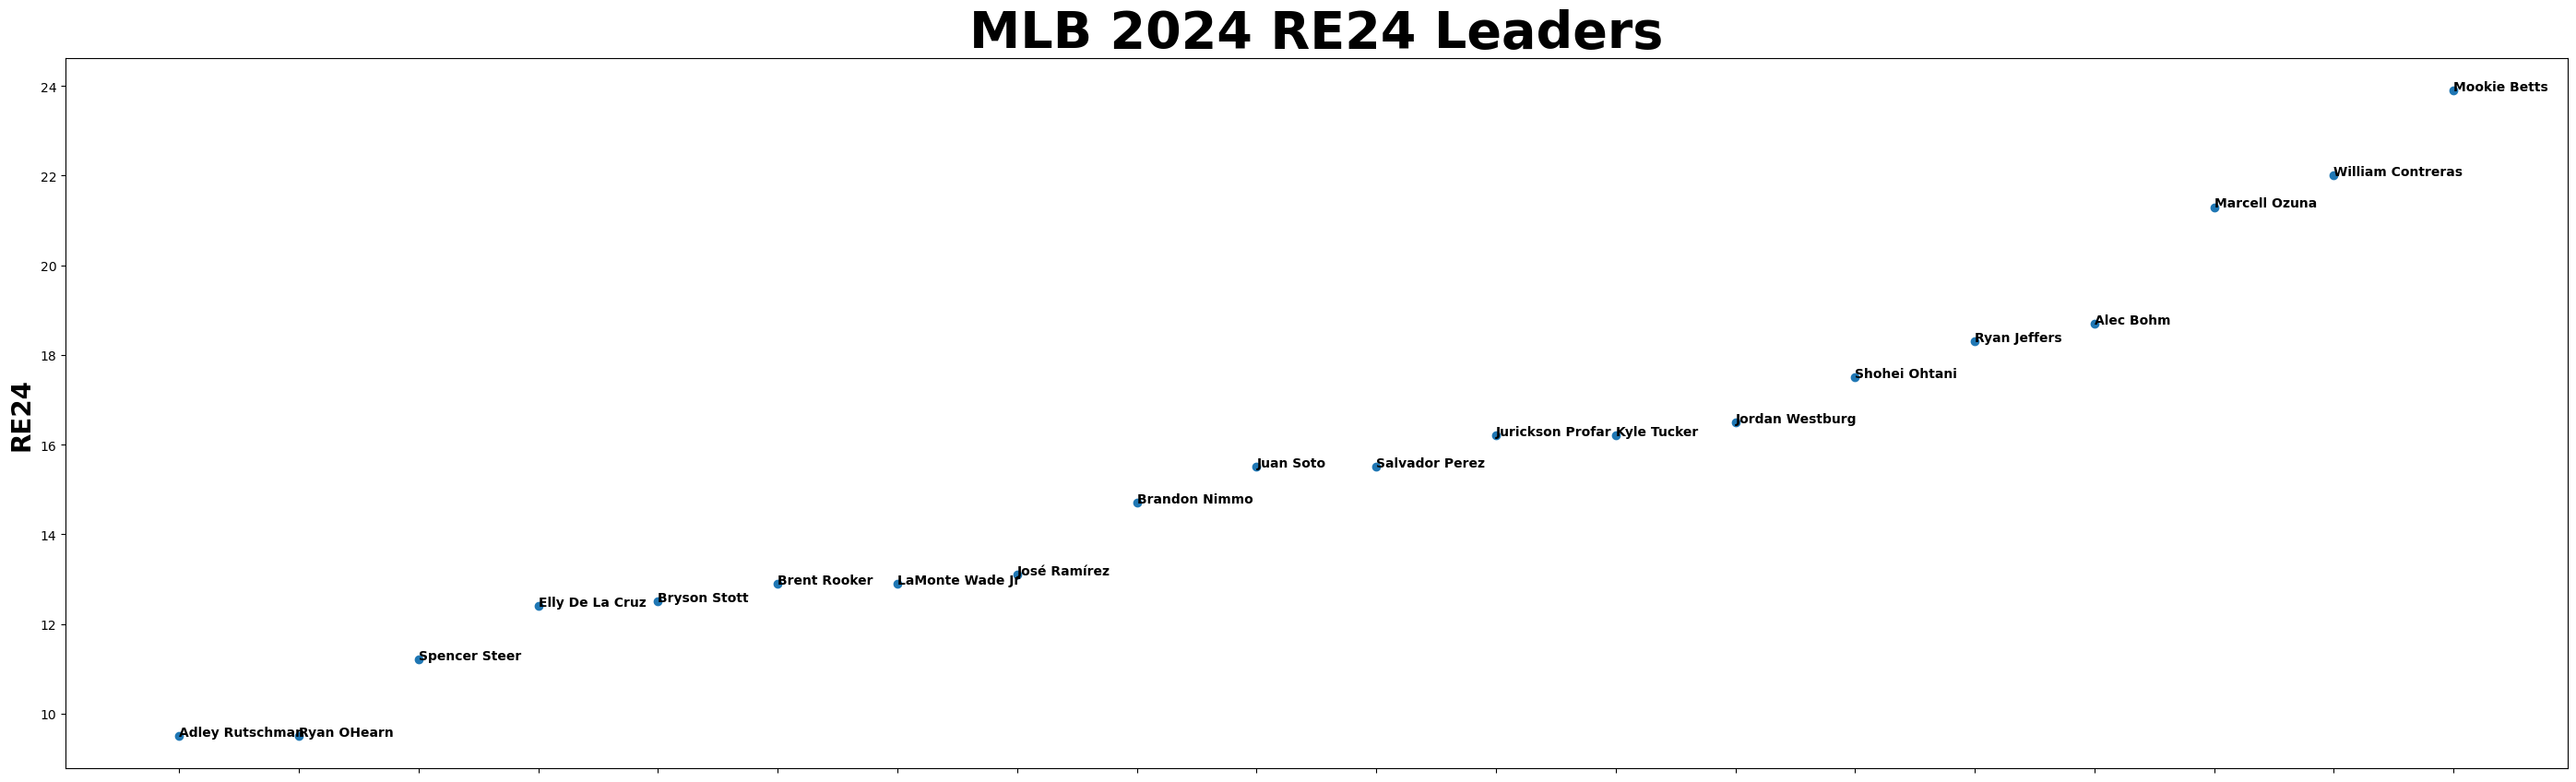

In [23]:
fig, ax = plt.subplots(figsize = (35, 10))

ax.scatter(x, y)

plt.xticks(visible=False) #how to make the xticks invisible
plt.ylabel('RE24', fontsize = 20, weight = "bold")
plt.title('MLB 2024 RE24 Leaders', fontsize = 40, weight = "bold")

for i, txt in enumerate(text):
    plt.annotate(txt, (x[i], y[i]), fontsize = 10, weight = "bold")
#to annotate points, convert everything to a list and use this iteration

plt.show()

We can see that some of the premier stars of the league are towards the top, such as Mookie Betts, Shohei Ohtani, Juan Soto, and Elly De La Cruz. In addition, there are also some lesser known names such as Lamonte Wade Jr., who boasts an impressive .470 on base average for the Giants, as well as Jurickson Profar, who for most of his career was an average utility player that has had an impressive start to the season with the bat. These leaders have done an expemplary job thus far hitting an elite level situationally and putting their teams in position to score runs.

In [24]:
d = df_cl['RE24'].tolist()
#converting the data into a list in order to get the mean and std for the histogram

m = statistics.mean(d)
sd = statistics.stdev(d)

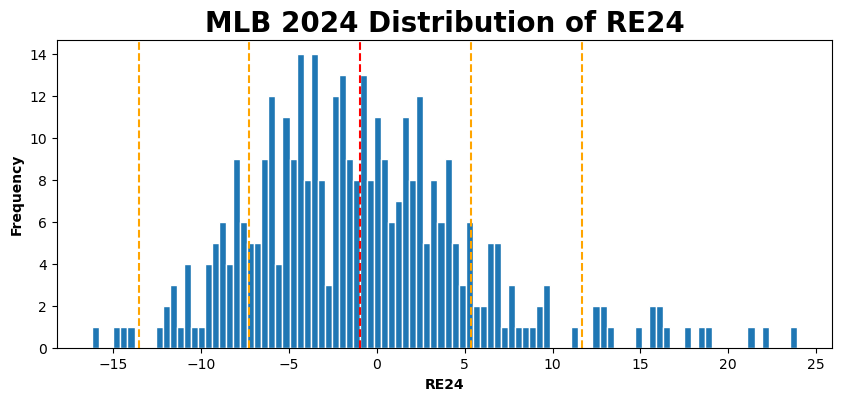

In [25]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.hist(df_cl['RE24'], bins = 100, edgecolor = "White")

plt.axvline(m, color = 'Red', linestyle = 'dashed', label = "Mean")
plt.axvline(m + sd, color = 'Orange', linestyle = 'dashed')
plt.axvline(m - sd, color = 'Orange', linestyle = 'dashed')
plt.axvline(m + 2*sd, color = 'Orange', linestyle = 'dashed')
plt.axvline(m - 2*sd, color = 'Orange', linestyle = 'dashed')
#showing the lines of the mean and interquartile range to get a general idea of where most of the RE24 values fall

plt.xlabel("RE24", fontsize = 10, weight = "bold")
plt.ylabel("Frequency", weight = "bold")
plt.title("MLB 2024 Distribution of RE24", fontsize = 20, weight = "bold")

plt.show()

Here is the distribution of RE24 scores across the league as of 5/18/2024, for hitters with 50 or more plate appearances. The average is around -1 RE24, so usually players are getting negative RE24 scores per their at bat. The standard deviation is roughly 5, and the distribution is roughly normal, but skewed slightly right. This makes sense, as most of the time players are recording outs in their at-bats, and thus receiving negative scores. The serious outliers are around 10 RE24 or above, and the seriously below average players are around -7.

In [26]:
df_ops = pd.read_csv('/Users/treychase/Downloads/mlb_2024_ops.csv')

In [27]:
df_ops.describe()

,Rk,Age,PA,RC,BA,OPS,OPS+
count,554.000000,554.000000,555.000000,519.000000,519.000000,519.000000,519.000000
mean,277.500000,28.288809,91.369369,11.150289,0.224514,0.654940,88.279383
std,160.070297,3.690021,66.770463,9.550140,0.100695,0.302052,84.121539
min,1.000000,20.000000,0.000000,-1.000000,0.000000,0.000000,-100.000000
25%,139.250000,26.000000,33.000000,3.000000,0.188000,0.533500,57.000000
50%,277.500000,28.000000,89.000000,9.000000,0.231000,0.660000,91.000000
75%,415.750000,31.000000,146.500000,17.000000,0.269500,0.776500,122.000000
max,554.000000,39.000000,600.000000,68.000000,1.000000,4.000000,986.000000


In [28]:
df_ops.head()

,Rk,Name,Age,Tm,PA,RC,BA,OPS,OPS+
0,1.0,CJ Abrams*,23.0,WSN,174,26.0,0.261,0.814,136.0
1,2.0,José Abreu,37.0,HOU,77,1.0,0.099,0.269,-20.0
2,3.0,Wilyer Abreu*,25.0,BOS,135,22.0,0.271,0.830,131.0
3,4.0,Ronald Acuña Jr.,26.0,ATL,181,21.0,0.245,0.696,99.0
4,5.0,Willy Adames,28.0,MIL,190,26.0,0.250,0.772,121.0


In [29]:
df_ops.dtypes

Rk      float64
Name     object
Age     float64
Tm       object
PA        int64
RC      float64
BA      float64
OPS     float64
OPS+    float64
dtype: object

In [30]:
df_ops = df_ops[df_ops["PA"] >= 50]
#sorting by PA to get a good sample size

In [31]:
df_ops = df_ops.sort_values(by ='OPS', ascending = False)
#sorting by descending OPS

In [32]:
df_ops['Name'] = df_ops['Name'].replace(r'[^\w\s]', '', regex=True)
#removing all extraneous characters from the name in order to join the two datasets together

In [33]:
df_ops.head(20)
#taking a look at the OPS and OPS+ leaders up to this date

,Rk,Name,Age,Tm,PA,RC,BA,OPS,OPS+
352,353.0,Shohei Ohtani,29.0,LAD,201,53.0,0.360,1.099,209.0
550,551.0,Christian Yelich,32.0,MIL,72,19.0,0.359,1.079,206.0
359,360.0,Marcell Ozuna,33.0,ATL,168,37.0,0.327,1.024,187.0
234,235.0,Danny Jansen,29.0,TOR,66,15.0,0.298,1.010,187.0
377,378.0,Kevin Pillar,35.0,TOT,66,15.0,0.328,1.005,181.0
504,505.0,Kyle Tucker,27.0,HOU,192,41.0,0.280,1.001,188.0
51,52.0,Mookie Betts,31.0,LAD,213,49.0,0.343,0.994,182.0
104,105.0,William Contreras,26.0,MIL,196,42.0,0.359,0.987,182.0
237,238.0,Ryan Jeffers,27.0,MIN,148,30.0,0.283,0.979,177.0
392,393.0,Rob Refsnyder,33.0,BOS,64,13.0,0.327,0.964,170.0


In [34]:
new_df = pd.merge(df_cl, df_ops, how ='left', left_on = ["Name", "Tm"], right_on = ["Name", "Tm"])
#joining the two dataframes together to find who generates RE24 value and hits at a high OPS

In [35]:
new_df

,Rk_x,Name,Age_x,PA_x,Tm,BtRuns,WPA,aLI,Clutch,RE24,Rk_y,Age_y,PA_y,RC,BA,OPS,OPS+
0,49,Mookie Betts,31,213,LAD,20.7,1.1,0.94,-0.5,23.9,52.0,31.0,213,49.0,0.343,0.994,182.0
1,101,William Contreras,26,196,MIL,19.4,1.8,1.01,0.2,22.0,105.0,26.0,196,42.0,0.359,0.987,182.0
2,335,Marcell Ozuna,33,168,ATL,16.8,1.9,1.08,0.5,21.3,360.0,33.0,168,37.0,0.327,1.024,187.0
3,57,Alec Bohm,27,185,PHI,14.3,1.9,1.01,0.7,18.7,60.0,27.0,185,34.0,0.333,0.921,163.0
4,221,Ryan Jeffers,27,148,MIN,13.4,1.7,0.97,0.3,18.3,238.0,27.0,148,30.0,0.283,0.979,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,304,Elehuris Montero,25,140,COL,-6.6,-1.0,0.93,0.0,-12.4,329.0,25.0,140,10.0,0.227,0.591,63.0
362,2,José Abreu,37,77,HOU,-10.9,-1.3,0.94,-0.2,-13.8,2.0,37.0,77,1.0,0.099,0.269,-20.0
363,45,Andrew Benintendi,29,157,CHW,-10.8,-0.8,1.05,0.7,-14.2,47.0,29.0,157,9.0,0.200,0.516,47.0
364,19,Tim Anderson,31,128,MIA,-11.4,-1.4,0.95,0.0,-14.9,20.0,31.0,128,6.0,0.197,0.456,31.0


In [36]:
new_df.columns.duplicated()
#none of the rows are duplicated, so the join was successful 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [37]:
x = new_df["RE24"]
y = new_df["OPS+"]

Text(0.5, 1.0, 'MLB 2024 RE24 vs. OPS+')

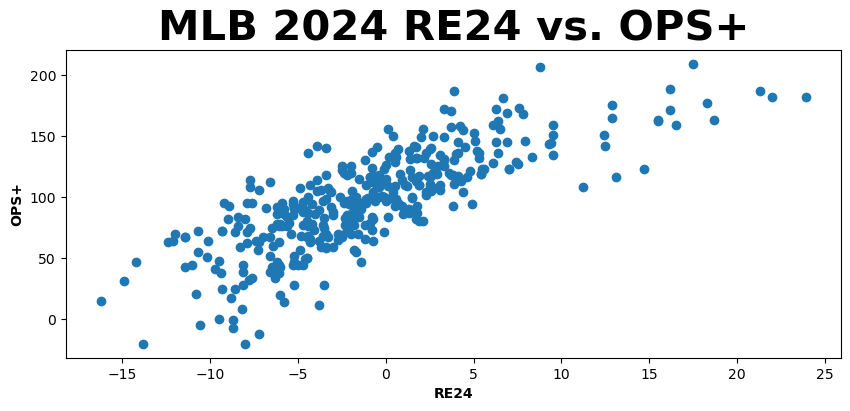

In [38]:
fig, ax = plt.subplots(figsize = (10, 4))

ax.scatter(x, y)

plt.xlabel("RE24", fontsize = 10, weight = "bold")
plt.ylabel("OPS+", fontsize = 10, weight = "bold")
plt.title("MLB 2024 RE24 vs. OPS+", fontsize = 30, weight = "bold")

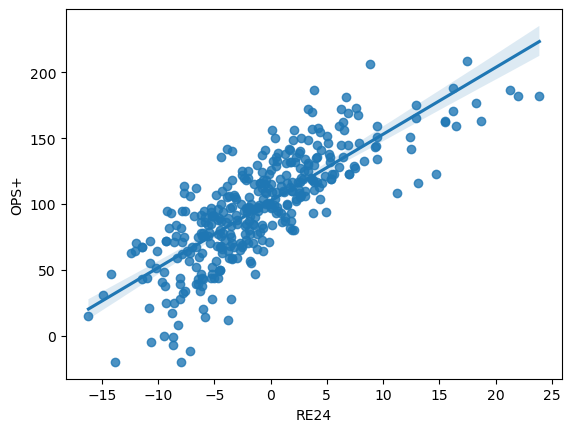

In [39]:
ax = sns.regplot(data = new_df, x = "RE24", y = "OPS+")
#to see a line best fit

Looking at the plots above, we can see that there is a pretty strong linear association between OPS+ and RE24. This should be true because players that slug and/or get on base have the highest chance or generating runs, or creating run value. Obviously, the stars of the league will produce runs regularly, but there are also some instances where players elevate themselves in high run probability situations despite middling stats overall. In order to find these players, we can sort the aggregated data and produce a visual.

In [40]:
#finally, I want to take a look at outliers, those who are hitting below league average typically but do have an above average RE24
outliers = new_df[(new_df['RE24'] >= new_df['RE24'].mean()) & (new_df['OPS+'] < 100)]

In [41]:
outliers = outliers.sort_values(by = 'RE24', ascending = False)

In [42]:
outliers

,Rk_x,Name,Age_x,PA_x,Tm,BtRuns,WPA,aLI,Clutch,RE24,Rk_y,Age_y,PA_y,RC,BA,OPS,OPS+
51,409,Corey Seager,30,181,TEX,-1.3,0.7,0.95,1.0,4.9,436.0,30.0,181,19.0,0.238,0.670,94.0
68,125,Yandy Díaz,32,196,TBR,-1.4,0.6,1.00,0.5,3.8,130.0,32.0,196,20.0,0.247,0.660,93.0
99,53,Charlie Blackmon,37,142,COL,-4.1,-0.3,0.94,0.1,2.1,56.0,37.0,142,15.0,0.237,0.655,80.0
103,479,Luis Urías,27,76,SEA,-1.5,0.5,1.00,0.8,1.9,510.0,27.0,76,6.0,0.154,0.615,80.0
106,162,Maikel Garcia,24,192,KCR,-3.3,-0.9,0.96,-0.6,1.8,170.0,24.0,192,22.0,0.239,0.657,87.0
107,518,Jacob Young,24,117,WSN,-0.4,0.2,1.00,0.2,1.8,553.0,24.0,117,14.0,0.262,0.651,93.0
110,43,Josh Bell,31,188,MIA,-4.1,0.2,0.99,0.6,1.7,45.0,31.0,188,16.0,0.212,0.638,82.0
115,165,Andrés Giménez,25,181,CLE,0.3,0.0,1.07,0.3,1.5,173.0,25.0,181,19.0,0.261,0.682,99.0
119,284,Reese McGuire,29,84,BOS,-1.3,-0.2,0.99,0.0,1.3,309.0,29.0,84,9.0,0.243,0.663,87.0
120,145,Estevan Florial,26,100,CLE,-1.4,0.0,1.04,0.1,1.3,151.0,26.0,100,9.0,0.189,0.663,90.0


In [43]:
x = outliers['RE24'].tolist()
y = outliers['OPS+'].tolist()

In [44]:
text = outliers["Name"].tolist()

In [45]:
text = [w.replace('\xa0', ' ') for w in text]

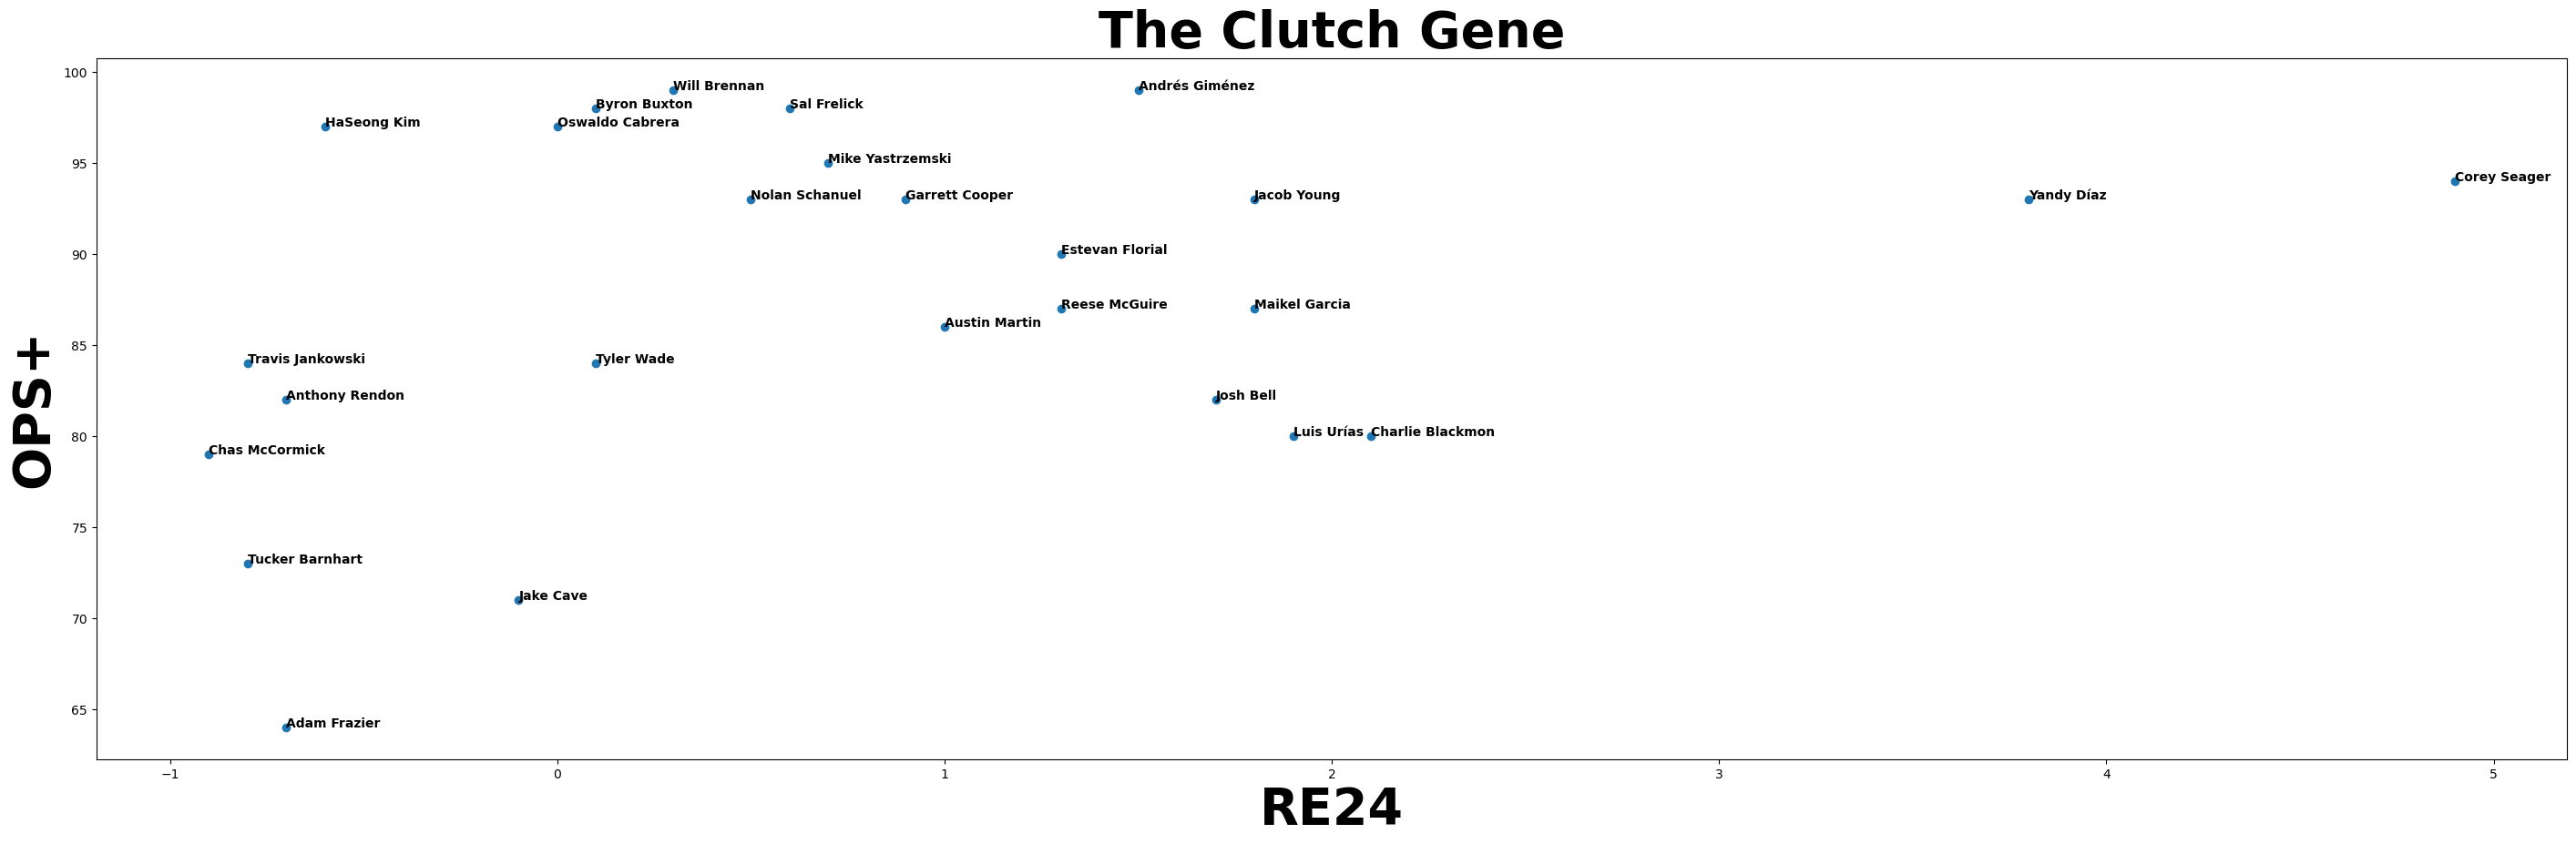

In [46]:
fig, ax = plt.subplots(figsize = (35, 10))

ax.scatter(x, y)
plt.xlabel("RE24", fontsize = 40, weight = "bold")
plt.ylabel("OPS+", fontsize = 40, weight = "bold")
plt.title("The Clutch Gene", fontsize = 40, weight = "bold")

for i, txt in enumerate(text):
    plt.annotate(txt, (x[i], y[i]), fontsize = 10, weight = "bold")

These players scattered above have an OPS+ less than 100 on the season, or in other words are below average hitters. They also have an RE24 above average, meaning they are still capitalizing in high leverage situations. They are taking their at-bats seriously and sticking to their approach that is appropriate to the situation. They might not have the raw numbers they desire but they are still stepping up to the plate when the team needs them to. It would be prudent as a manager to look past their baseline numbers and consider them further for these opportunties, whether that means pinch hit opportunities or lineup placement.

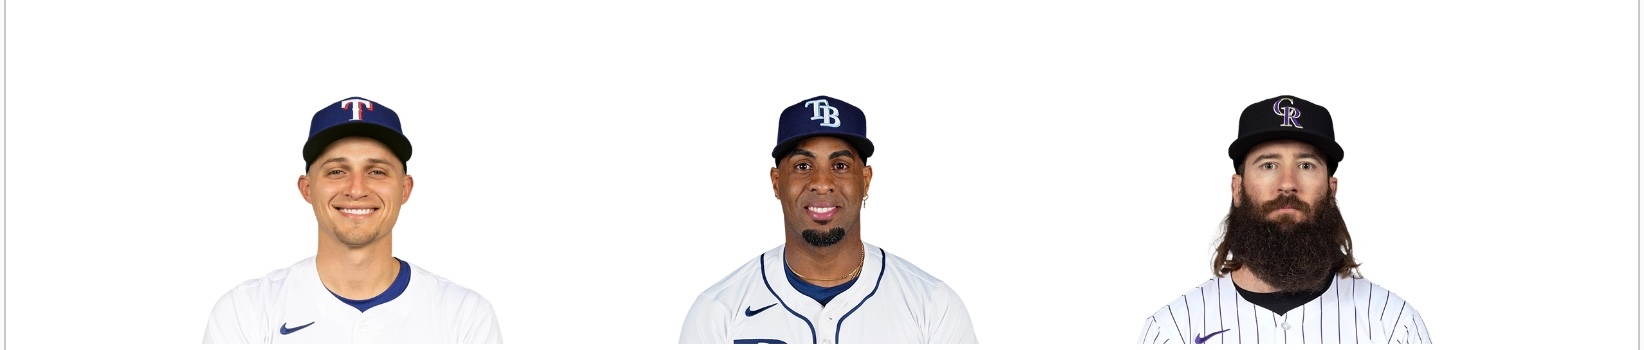

In [49]:
from IPython.display import Image
from IPython.display import display
x = Image(filename='/Users/treychase/Downloads/Image 5-20-24 at 3.28 PM.jpeg')
display(x)

Some important players to note in this list are Yandy Diaz and Corey Seager. Despite an OPS+ of 93 and 94 respectively, they are producing elite RE24 values. Both are all-star caliber players, so I would expect their raw numbers to improve as the sample size increases. Their current RE24 metrics indicate that they are still producing value for their team, and their impact will be even more tangible when they find their swings again. Long time Rockies outfielder Charlie Blackmon also stands out. At the ripe age of 37 with a .655 OPS, he is still showing a veteran prescence with his approach and ability to execute situationally. Players such as Jake Cave, Reese McGuire, and Jacob Young are around replacement level bench bats, but should be considered for pinch hit opportunities that require a disciplined approach. Overall, RE24 is a fun statistic to play with, as it is a quanitative assessment of how well players approach situtational hitting, and should be used both to gague top level talent and replacement level players alike. Managers can leverage it to make decisions both in the lineup and spot opportunities to increase their probability of scoring runs, and figure out which players step up when the lights shine bright. 